1. Data Frame

In [130]:
import pandas as pd

In [131]:
# First way:

# Create three lists:

nation = pd.Series(["MAS", "THA", "SGP"])
gold = pd.Series([144, 72, 58])
silver = pd.Series([91, 86, 56])

# Merge those lists:

df1 = pd.DataFrame({"Nation": nation,
                   "Gold": gold,
                   "Silver": silver},
                  columns = ["Nation", "Gold", "Silver"])

df1

,Nation,Gold,Silver
0,MAS,144,91
1,THA,72,86
2,SGP,58,56


In [132]:
## Second way:
data = {"Nation": ["MAS", "THA", "SGP"],
       "Gold": [144, 72, 58],
       "Silver": [91, 86, 56]}

df2 = pd.DataFrame(data, columns = ["Nation", "Gold", "Silver"])
df2


,Nation,Gold,Silver
0,MAS,144,91
1,THA,72,86
2,SGP,58,56


2. Series

In [136]:
type(gold)

pandas.core.series.Series

In [137]:
sum(gold)

274

In [138]:
gold >100

0     True
1    False
2    False
dtype: bool

In [139]:
gold[0]

144

In [140]:
len(gold)

3

Read the csv files:


In [141]:
edu = pd.read_csv("C:/Users/mlcl.local/Downloads/educ_Data.csv", na_values = ":")
edu.head()

,TIME,GEO,INDIC_ED,Value,Flag and Footnotes
0,2000,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN
1,2001,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN
2,2002,European Union (28 countries),Total public expenditure on education as % of ...,5.00,e
3,2003,European Union (28 countries),Total public expenditure on education as % of ...,5.03,e
4,2004,European Union (28 countries),Total public expenditure on education as % of ...,4.95,e


In [142]:
type(edu)

pandas.core.frame.DataFrame

In [143]:
edu.shape

(384, 5)

In [26]:
a = edu.shape
type(a)

tuple

In [27]:
a[0]

384

It is possible to specify which column of the original data set to be read into Python:

In [144]:
edu = pd.read_csv("C:/Users/mlcl.local/Downloads/educ_Data.csv", na_values = ":",
                 usecols = ["TIME", "GEO", "Value"])

edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [145]:
# Name of colums:
list(edu)

['TIME', 'GEO', 'Value']

2. Data Wrangling

In [146]:
s1 = edu["Value"]
s1.head()

0     NaN
1     NaN
2    5.00
3    5.03
4    4.95
Name: Value, dtype: float64

In [147]:
s2 = edu[["Value", "TIME"]]
s2.head()

,Value,TIME
0,NaN,2000
1,NaN,2001
2,5.00,2002
3,5.03,2003
4,4.95,2004


In [148]:
type(s2)

pandas.core.frame.DataFrame

In [149]:
edu["GEO"].head()

0    European Union (28 countries)
1    European Union (28 countries)
2    European Union (28 countries)
3    European Union (28 countries)
4    European Union (28 countries)
Name: GEO, dtype: object

In [150]:
# Extract rows

df2 = edu[10:13]
df2

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91


In [151]:
# Extract rows and colums

edu.loc[2:5,["Value", "TIME"]]

,Value,TIME
2,5.00,2002
3,5.03,2003
4,4.95,2004
5,4.92,2005


In [152]:
# Extract observation from row 0,2,6,19 in the colum GEO:

edu.loc[[0,2,6,19], "GEO"]

0     European Union (28 countries)
2     European Union (28 countries)
6     European Union (28 countries)
19    European Union (27 countries)
Name: GEO, dtype: object

In [153]:
edu.loc[[4,6,10], ["Value", 'TIME']]

,Value,TIME
4,4.95,2004
6,4.91,2006
10,5.41,2010


In [154]:
# Make the subset
df1.sample(2, replace = False)

,Nation,Gold,Silver
2,SGP,58,56
1,THA,72,86


In [155]:
edu.sample(10, random_state = 9)
# random_state is similar to set.seed()

,TIME,GEO,Value
105,2009,Bulgaria,4.58
282,2006,Malta,6.45
235,2007,Latvia,5.07
162,2006,Ireland,4.73
294,2006,Netherlands,5.50
101,2005,Bulgaria,4.25
280,2004,Malta,4.66
325,2001,Portugal,5.39
124,2004,Denmark,8.43
80,2008,Euro area (13 countries),4.94


In [156]:
# extract 50% from edu:
df50 = edu.sample(frac = 0.5, random_state = 9)
df50.shape

(192, 3)

In [157]:
edu[["TIME", "Value"]].sample(10, random_state = 5)

,TIME,Value
52,2004,4.80
213,2009,4.70
139,2007,4.49
182,2002,4.25
300,2000,5.66
75,2003,5.04
49,2001,NaN
344,2008,NaN
377,2005,6.30
157,2001,4.24


In [158]:
edu[["TIME", "Value"]].sample(10, random_state = 5). mean()

TIME     2004.000
Value       4.935
dtype: float64

Filter data

In [159]:
bigger_than7 = edu[edu["Value"] > 7]
bigger_than7.head()

,TIME,GEO,Value
120,2000,Denmark,8.28
121,2001,Denmark,8.44
122,2002,Denmark,8.44
123,2003,Denmark,8.33
124,2004,Denmark,8.43


In [160]:
edu[edu["Value"]>7].head()

,TIME,GEO,Value
120,2000,Denmark,8.28
121,2001,Denmark,8.44
122,2002,Denmark,8.44
123,2003,Denmark,8.33
124,2004,Denmark,8.43


In [161]:
france = edu[edu["GEO"]== "France"]
france.head()

,TIME,GEO,Value
192,2000,France,6.04
193,2001,France,5.95
194,2002,France,5.90
195,2003,France,5.92
196,2004,France,5.80


In [162]:
edu[(edu["GEO"] == "France") & (edu["TIME"] >= 2006)]

,TIME,GEO,Value
198,2006,France,5.61
199,2007,France,5.62
200,2008,France,5.62
201,2009,France,5.90
202,2010,France,5.86
203,2011,France,5.68


In [163]:
fs = edu[(edu["GEO"] == "France") | (edu["GEO"] == "Spain")]
fs[fs["TIME"] > 2005 ]

,TIME,GEO,Value
186,2006,Spain,4.26
187,2007,Spain,4.34
188,2008,Spain,4.62
189,2009,Spain,5.02
190,2010,Spain,4.98
191,2011,Spain,4.82
198,2006,France,5.61
199,2007,France,5.62
200,2008,France,5.62
201,2009,France,5.90


Filter missing values

In [164]:
# detect missing values:
edu["Value"].isnull().head()

0     True
1     True
2    False
3    False
4    False
Name: Value, dtype: bool

In [165]:
edu["Value"].isnull().sum()

23

In [166]:
# Create your own functions:

def find_na(x):
    return(x.isnull().sum())

find_na(edu["Value"])

23

In [167]:
edu.apply(find_na)

TIME      0
GEO       0
Value    23
dtype: int64

In [168]:
missing_df = edu[edu["Value"].isnull()]
missing_df.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


In [169]:
full_df = edu.dropna(subset = ["Value"])
full_df.head()

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


In [170]:
# create a new df files:

import numpy as np
df = pd.DataFrame([[np.nan, 2, np.nan, 0, 3],
                  [2,4,np.nan, 1, 2],
                  [2,3,np.nan, 2, 1],
                 [np.nan, np.nan, np.nan, 5, 5]], columns = list("ABCDE"))

df

,A,B,C,D,E
0,NaN,2.0,NaN,0,3
1,2.0,4.0,NaN,1,2
2,2.0,3.0,NaN,2,1
3,NaN,NaN,NaN,5,5


In [171]:
# Delete Na columns:

df.dropna(how = "any", axis = 1) # at least one na

,D,E
0,0,3
1,1,2
2,2,1
3,5,5


In [172]:
#  Delete na rows:

df.dropna(axis = 0, how = "any")


,A,B,C,D,E


In [173]:
# Keep rows with more than 3 real values:

df.dropna(thresh = 3)

,A,B,C,D,E
0,NaN,2.0,NaN,0,3
1,2.0,4.0,NaN,1,2
2,2.0,3.0,NaN,2,1


Sorting dataframe

In [174]:
df_decending = edu.sort_values(by ="Value", ascending = False)
df_decending.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44


In [175]:
by_nation = edu.sort_values(by = "GEO")
by_nation.head()

,TIME,GEO,Value
300,2000,Austria,5.66
309,2009,Austria,5.98
308,2008,Austria,5.47
307,2007,Austria,5.33
306,2006,Austria,5.40


Calculus

In [176]:
edu["Value"].max()

8.81

In [177]:
edu["Value"].mean()

5.203988919667592

In [178]:
edu.mean()

TIME     2005.500000
Value       5.203989
dtype: float64

In [179]:
edu.describe()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


In [180]:
edu[["GEO", "Value"]].groupby("GEO").describe().head()

Value                                                       
               count      mean       std   min     25%    50%     75%   max
GEO                                                                        
Austria         12.0  5.618333  0.209060  5.33  5.4625  5.595  5.7550  5.98
Belgium         11.0  6.189091  0.278081  5.92  5.9850  6.020  6.4900  6.58
Bulgaria        12.0  4.093333  0.273440  3.70  3.8800  4.065  4.2875  4.58
Cyprus          12.0  7.023333  0.777623  5.42  6.7275  6.985  7.5550  7.98
Czech Republic  12.0  4.168333  0.213747  3.83  4.0200  4.175  4.3300  4.51

In [181]:
edu[["GEO", "Value"]].groupby("GEO").mean()

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333
Denmark,8.331667
Estonia,5.270833
Euro area (13 countries),5.019091
Euro area (15 countries),5.025455


In [182]:
s = edu["Value"]/100
s.head()

0       NaN
1       NaN
2    0.0500
3    0.0503
4    0.0495
Name: Value, dtype: float64

In [183]:
# use apply function for numpy
import numpy as np
s = edu["Value"].apply(np.sqrt)
s.head()

0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64

In [184]:
s = edu["Value"].apply(lambda x: x**2 -1)
s.head()

0        NaN
1        NaN
2    24.0000
3    24.3009
4    23.5025
Name: Value, dtype: float64

Add or delete rows/columns

In [185]:
edu["ValueNorm"] = edu["Value"]/ edu["Value"].max()
edu.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


In [186]:
edu.drop("ValueNorm", axis = 1, inplace = True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [187]:
# Add values:

edu= edu.append({"TIME": 2000,
                "Value": 5,
                "GEO": "Vietnam"}, ignore_index = True)
edu.tail()

,TIME,GEO,Value
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2000,Vietnam,5.00


In [188]:
edu.drop(max(edu.index), axis = 0, inplace = True)
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


Replace NA == 0

In [189]:
eduFilled = edu.fillna(value = {"Value": 0})
eduFilled.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),0.00
1,2001,European Union (28 countries),0.00
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


TRANSFORM DATA

In [206]:
# Filter obs after 2006:

filterd_data = edu[edu["TIME"]> 2005]

# Pivot table:

pivedu = pd.pivot_table(filterd_data,
                       values = "Value",
                       index = ["GEO"],
                       columns = ["TIME"])

pivedu.tail(20)

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
European Union (27 countries),4.91,4.93,5.04,5.38,5.41,5.25
European Union (28 countries),4.91,4.92,5.04,5.38,5.41,5.25
Finland,6.18,5.90,6.10,6.81,6.85,6.76
France,5.61,5.62,5.62,5.90,5.86,5.68
Germany (until 1990 former territory of the FRG),4.43,4.49,4.57,5.06,5.08,4.98
Greece,NaN,NaN,NaN,NaN,NaN,NaN
Hungary,5.44,5.29,5.10,5.12,4.90,4.71
Ireland,4.73,4.92,5.67,6.43,6.41,6.15
Italy,4.67,4.27,4.56,4.70,4.50,4.29


In [207]:
type(pivedu)

pandas.core.frame.DataFrame

In [208]:
pivedu.loc[["Spain", "France"], [2006,2011]]

TIME,2006,2011
GEO,,
Spain,4.26,4.82
France,5.61,5.68


To remove some observations using the drop () function, to change the label for an observation using rename () function, to remove any line with NA using the dropna () function:

In [209]:
# Drop
## set index 


pivedu = pivedu.drop(["Euro area (13 countries)",
                      "Euro area (15 countries)",
                      "Euro area (17 countries)",
                      "Euro area (18 countries)",
                      "European Union (25 countries)",
                      "European Union (27 countries)",
                      "European Union (28 countries)"], axis = 0)

pivedu = pivedu.rename(index = {"Germany (until 1990 former territory of the FRG)": "Germany"})

pivedu = pivedu.dropna()

pivedu.head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


In [214]:
totalSum = pivedu.sum(axis = 1)
totalSum.head()
totalSum.rank(ascending = False, method = "dense").sort_values().head()

GEO
Denmark    1.0
Cyprus     2.0
Finland    3.0
Malta      4.0
Belgium    5.0
dtype: float64

VISUALISATION WITH Matplotlib

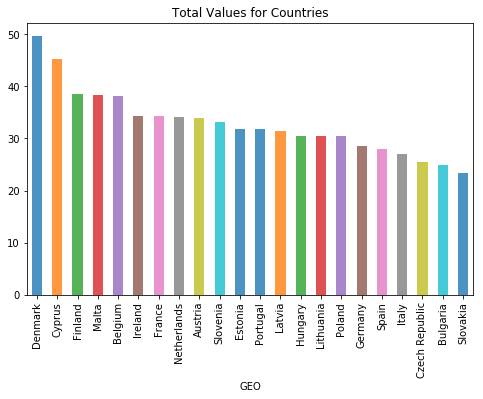

In [218]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,5))

totalSum = pivedu.sum(axis = 1).sort_values(ascending = False)
totalSum.plot(kind = "bar",
             style = "b",
             alpha = 0.8,
             title = "Total Values for Countries")

plt.show()

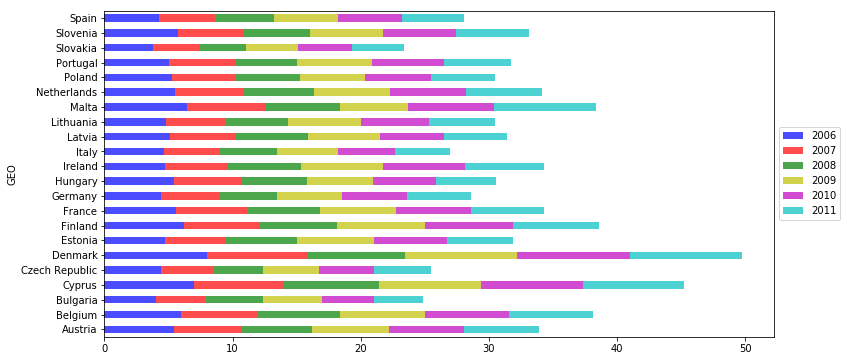

In [219]:
# chose colours:
my_colors = ["b", "r", "g", "y", "m", "c"]

ax = pivedu.plot(kind = "barh",
                stacked = True,
                color = my_colors,
                figsize = (12,6),
                alpha = 0.7)

ax.legend(loc= "center left", bbox_to_anchor = (1,0.5))
plt.show()